#  DSC530-T304 Data Exploration and Analysis - Week 3 #

## Exploratory Data Analysis and Distributions ##

### Excercise Chapter 1 ###

-----

In [1]:
# Download pregency and respondent data files from thinkstat

from os.path import basename, exists

# Declare a function to download the files to local
def download(fileurl):
    filename = basename(fileurl)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(fileurl, filename)
        print("Downloaded " + local)
        


In [2]:
# Dowload the python and data files to load pregnency and respondent data 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [3]:
# import the script to laod data
import nsfg

In [4]:
# Load Pregency data in a Dataframe
preg_df = nsfg.ReadFemPreg()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [5]:
# Load respondent data in a Data frame
respdnt_df = nsfg.ReadFemResp()
respdnt_df.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


-----------

### Excercise question 1-1 ###

**Open chap01ex.ipynb. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises you should try**

**Select the `birthord` column, print the value counts**

In [6]:
# use value_counts function to print unique value counts
birthorder = preg_df['birthord']
preg_df.birthord.value_counts().sort_index()

birthord
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

**Select the `prglngth` column, print the value counts**

In [7]:
# use value_counts function to print unique value counts
pregLength = preg_df['prglngth']
preg_df.prglngth.value_counts().sort_index()

prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64

**Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.**

In [8]:
# use the lb to kg unit convertor
lb_to_kg_convr_fctr = 0.45359237
# create a new feature or column totalwgt_kg  and use the totalwgt_lb field values and multiple by lb to kg unit convertor 
preg_df['totalwgt_kg'] = preg_df['totalwgt_lb'] * lb_to_kg_convr_fctr
preg_df.totalwgt_kg.mean()

3.295633631632828

**Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?**

In [9]:
respdnt_df.age_r.value_counts().sort_index()

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64

In [10]:
print("Youngest respondent is 15 years old")
print("Oldest respondent is 44 years old" )

Youngest respondent is 15 years old
Oldest respondent is 44 years old


**How old is the respondent with caseid 1?**

In [11]:
respdnt_df[respdnt_df.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

In [12]:
print("Age of the respindent for case id 1 is 44 years")

Age of the respindent for case id 1 is 44 years


**What are the pregnancy lengths for the respondent with caseid 2298?**

In [13]:
random_prgLength = preg_df[preg_df.caseid==2298].prglngth
random_prgLength 

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [14]:
print("Pregency lengths are \n", random_prgLength)

Pregency lengths are 
 2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64


**What was the birthweight of the first baby born to the respondent with `caseid` 5012?**

In [15]:
preg_df[preg_df.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

---------
### Excercise 1-2 ###

**The variable pregnum is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable**

In [16]:
respdnt_df.pregnum.value_counts().sort_index()

pregnum
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: count, dtype: int64

**You can also cross-validate the respondent and pregnancy files by comparing pregnum for each respondent with the number of records in the pregnancy file.**

In [17]:
# List respondent rows that has pregnum value 4
respdnt_df[respdnt_df.pregnum==4]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
17,5862,1,5,4,1,5.0,33,33,831,33,...,0,3056.771190,3456.489520,4386.630850,1,18,1234,1222,16:42:13,107.819667
30,9334,1,5,4,1,5.0,34,34,829,34,...,0,2417.628123,2828.685045,3589.884191,1,18,1237,1225,11:18:24,48.615500
40,4463,1,5,6,1,5.0,25,25,929,25,...,0,2418.202005,3045.972005,3303.356639,1,83,1230,1218,15:13:54,136.100833
43,7011,1,5,3,1,5.0,34,34,815,34,...,0,3363.355288,3782.074549,4799.830810,2,83,1233,1221,13:26:28,94.169833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,7258,5,5,5,1,5.0,32,32,842,32,...,0,6074.709226,6687.779090,8487.460444,2,23,1231,1219,20:47:56,78.317333
7554,5325,5,5,5,5,5.0,40,40,743,40,...,0,4870.965001,5340.644198,8900.183557,2,23,1231,1219,18:49:04,93.460000
7599,7716,1,5,3,5,5.0,41,41,729,41,...,0,1720.605492,2040.142199,3399.896974,1,76,1228,1216,13:49:51,148.055333
7605,7515,5,5,5,5,5.0,44,44,696,44,...,0,15910.846568,17148.705894,28578.318372,2,76,1234,1222,12:02:46,92.371833


In [18]:
# Choose a case id (5862) from the list above and 
# Print the pregnum value in respondent data file  as it is not listed in the visible columns for confirmation
respdnt_df[respdnt_df.caseid==5862].pregnum

17    4
Name: pregnum, dtype: int64

In [19]:
# use the above case id (5862) in pregnancy file above to print the number of records in respondent file
preg_df[preg_df.caseid==5862]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
6464,5862,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,3056.77119,3456.48952,4386.63085,1,18,NaN,NaN,NaN
6465,5862,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,3056.77119,3456.48952,4386.63085,1,18,NaN,7.1875,3.260195
6466,5862,3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,3056.77119,3456.48952,4386.63085,1,18,NaN,NaN,NaN
6467,5862,4,32.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,...,0,0,3056.77119,3456.48952,4386.63085,1,18,NaN,NaN,NaN


**You can use nsfg.MakePregMap to make a dictionary that maps from each caseid to a list of indices into the pregnancy DataFrame.**

In [20]:
caseid = 5862
preg_map = nsfg.MakePregMap(preg_df)
indices = preg_map[caseid]
preg_df.outcome[indices].values

array([4, 1, 4, 6], dtype=int64)

In [21]:
preg_df[preg_df.caseid==5862].outcome

6464    4
6465    1
6466    4
6467    6
Name: outcome, dtype: int64

--------
### Excercise Chapter 2 ###

#### Excercise 2-1 ####

**Exercise 2.1 Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late**

**Which summary statistics would you use if you wanted to get a story on the evening news?**

In [22]:
import thinkstats2
import thinkplot



In [23]:
# use nsfg method to clean the data to replace nan values and introduce new feature 'totalwgt_lb' that adds birthwgt_lb &
# birthwgt_oz
nsfg.CleanFemPreg(preg_df)
live_birth = preg_df[preg_df.outcome == 1]

# Filter and split the pregnancy dataframe
# filter the live birth records and split by first baby or subsequrnt baby
firsts = live_birth[live_birth.birthord == 1]
others = live_birth[live_birth.birthord != 1]


In [24]:
# create histogram inputs for pregnancy length of first baby and subsequent baby using thinkstat script 
first_hist = thinkstats2.Hist(firsts.prglngth, label='First baby')
other_hist = thinkstats2.Hist(others.prglngth,  label ='Subsequent baby')

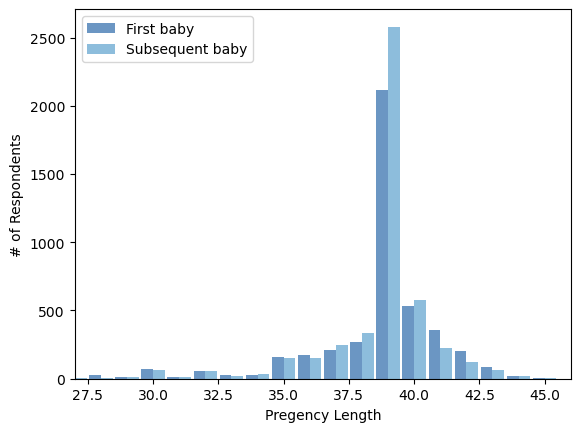

<Figure size 800x600 with 0 Axes>

In [25]:
# using thinkplot script plot a histogram to compare the first and subsequent baby  pregnency lengths
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='Pregency Length', ylabel='# of Respondents', xlim=[27, 46], LEGEND = True)

- Will use  the above summary statistics histogram to compare the first baby and not first baby pregency live birth data.  This will be used to talk about whether first babies arrive late.

**Which ones would you use if you wanted to reassure an anxious patient**

In [26]:
# create a histogram input data for live birth  pregnency lengths
live_hist =  thinkstats2.Hist(live_birth.prglngth, label='Pregnency Length')

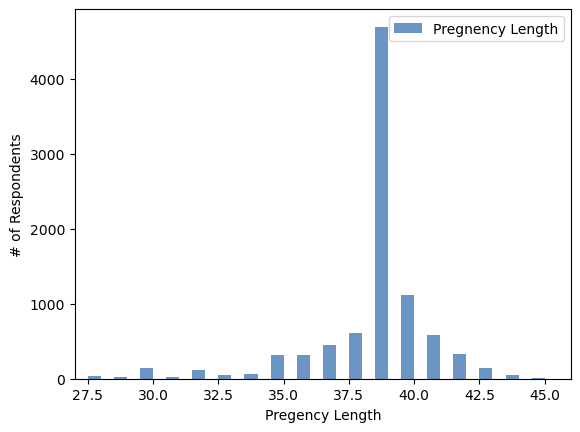

<Figure size 800x600 with 0 Axes>

In [27]:
# using thinkplot script plot a histogram to display live birth pregnency lengths
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(live_hist, align='right', width=width)
thinkplot.Show(xlabel='Pregency Length', ylabel='# of Respondents', xlim=[27, 46], LEGEND = True)

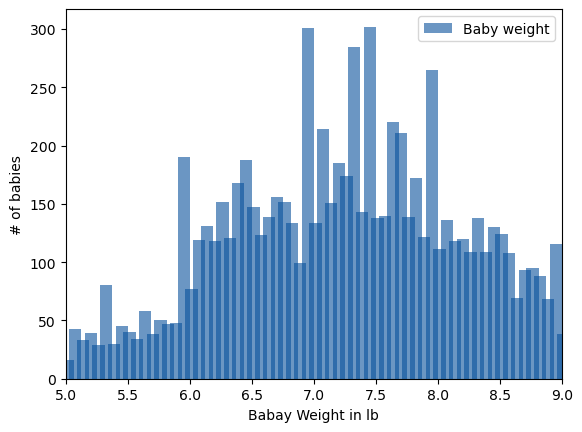

<Figure size 800x600 with 0 Axes>

In [28]:
# create a histogram input data for baby birth
babywt_hist =  thinkstats2.Hist(live_birth.totalwgt_lb, label='Baby weight')

# Plot a histogram to display the baby weights.  
# Tailor the plot to show weights  between 5 to 9 pound (to avoid showing under or over weight babies 
# statistics to expecting mothers)
width = 0.1
thinkplot.PrePlot(2)
thinkplot.Hist(babywt_hist, align='right', width=width)
thinkplot.Show(xlabel='Babay Weight in lb', ylabel='# of babies', xlim=[5, 9], LEGEND = True)

Will use the above two summary summary statistics to show anxious mothers

- First one to show which week has highest probability for the baby to be born.  
For mothers who anxious about  baby born earlier than 38th week or still not arrived after 38th that there are previous history that babies were born early and late.
- Use the second one to clear any baby weight concerns. (Limit the range to avoid any negatove thoughts)

**Finally, imagine that you are Cecil Adams, author of The Straight Dope (http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.**

In [29]:
# Print the live birth record count for first baby
len(firsts)


4413

In [30]:
# Print the live birth record count for subsequent baby
len(others)

4735

In [31]:
# Print the live birth pregnancy length average value for first baby
firsts.prglngth.mean()

38.60095173351461

In [32]:
# Print the live birth pregnancy length average value for subsequent baby
others.prglngth.mean()

38.52291446673706

In [33]:
# Print the live birth pregnancy length median value for first baby
firsts.prglngth.median()

39.0

In [34]:
# Print the live birth pregnancy length median value for subsequent baby
others.prglngth.median()

39.0

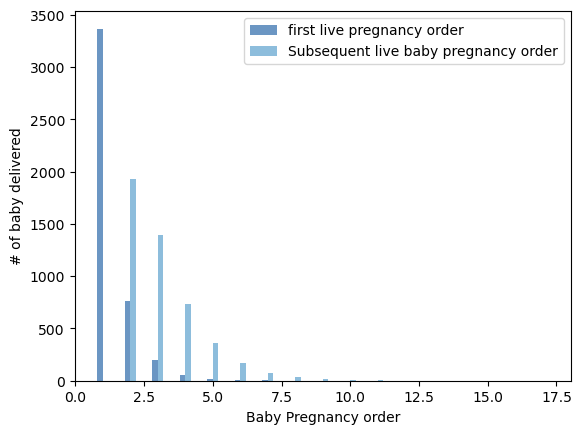

<Figure size 800x600 with 0 Axes>

In [35]:
# create a histogram input to capture the pregnancy order for live birth for first and subsequent babies
first_order_hist =  thinkstats2.Hist(firsts.pregordr, label='first live pregnancy order')
other_order_hist =  thinkstats2.Hist(others.pregordr, label='Subsequent live baby pregnancy order')
width = 0.2
thinkplot.PrePlot(2)
thinkplot.Hist(first_order_hist, align='right', width=width)
thinkplot.Hist(other_order_hist, align='left', width=width)
thinkplot.Show(xlabel='Baby Pregnancy order', ylabel='# of baby delivered',  LEGEND = True)

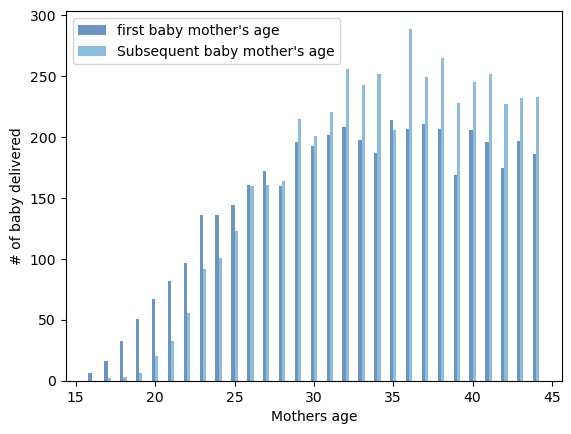

<Figure size 800x600 with 0 Axes>

In [36]:
# create a histogram input to capture mother's age during live birth for first and subsequent babies
first_mother_age_hist =  thinkstats2.Hist(firsts.ager, label="first baby mother's age")
other_mother_age_hist =  thinkstats2.Hist(others.ager, label="Subsequent baby mother's age")
width = 0.2
thinkplot.PrePlot(2)
thinkplot.Hist(first_mother_age_hist, align='right', width=width)
thinkplot.Hist(other_mother_age_hist, align='left', width=width)
thinkplot.Show(xlabel='Mothers age', ylabel='# of baby delivered',  LEGEND = True)

**Using the mean, median,  pregnancy length,  mother's age statistics for first and subsequent babies to draw the comments on whether first baby arrive late. These values dos not show much differene and captured as part of Cecil Adam's comment**

Answering simillarly like Cecil Adams

- The study includes a balanced sample size of 4413 first baby cases and 4735 cases of subsequent babies.

<br>

- In the quest to determine if first babies tend to be fashionably late, the data tells us that there's a slender gap in the average pregnancy length between first-time moms (38.6 weeks) and those with more experience (38.52 weeks), amounting to a mere 13-hour difference.

<br>

- Delving into the nuances, the median value for both groups converges at 39 weeks. 

<br>

- Notably, the order of pregnancy seems to play a role for first babies, staying within a range of 5 weeks, while subsequent pregnancies span from 2 to 9 weeks without exerting a discernible impact on the duratio

<br>


- Surprisingly, the age of respondents, ranging from 15 to 44 for both first-time and experienced mothers, fails to exert any sway on pregnancy length. Age emerges as an inconsequential factor, whether it's a debut childbirth or not, as reflected in the data.

- Well, buckle up for this thrilling revelation – the impartial observer is here to spill the tea: whether it's a rookie or a seasoned pro, baby arrival times seem to be sharing the same playbook. That supposed myth about first babies being fashionably late? Turns out, it's as real as a unicorn riding a skateboard – pure fiction!

#### Excercise 2-4 ####

**Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.**

In [37]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [38]:
firsts.totalwgt_lb.median(), others.totalwgt_lb.median()

(7.3125, 7.375)

The first babies are marginally lighter by few ounces than subsequent babies

**Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?**

In [39]:
import math as m
def CohenEffectSize(group1, group2):
    # calculate the difference in mean values
    grp_diff = group1.mean() - group2.mean()

    grp1_len, grp2_len = len(group1), len(group2)

    pooled_var = (grp1_len * group1.var() + grp2_len * group2.var()) / (grp1_len + grp2_len)
    cohen_d = grp_diff / m.sqrt(pooled_var)
    return cohen_d

In [40]:
# Use Cohen’s d function to compare first and subsequent baby pregnancy lengths
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

- The difference is very minor and the distribution and variance is simillar betweeen the groups.